Laguerre Experiments
====================
The scope of this notebook is to test the capabilities of Laguerre networks as orthonormal basis to reconstruct LTI system dynamics. The first part shows how they can be used to reconstruct an arbitrary discrete-time system. In the second part, they are used to reconstruct an ideal delay system and they are compared with an approximation using Legendre Polynomials. 

The theory was based on the treatment in:

> Wang, L. (2009). Model predictive control system design and implementation using MATLAB®. Springer Science & Business Media.

1. Approximation of a dynamical system using Laguerre networks
2. Approximation of an ideal delay using Laguerre networks and Legendre Polynomials
3. Approximation of a dynamical system using Legendre polynomials

## Fundamentals of Laguerre Functions
Laguerre Functions $\ell^{i}(t)$ are a family of eigenfunctions of the Sturm-Liouville problem ($i = 1, 2, 3, \dots$). In particular, a discrete-time Laguerre Network (DTLN) $l^{(i)}(z)$ is generated from the discretization of a continuous-time Laguerre Network (CTLN). A Laguerre Network can be simply interpreted as the Laplace transform of a continuous-time Laguerre function $\ell^{i}(t)$:

$$\ell^{\left(i\right)}\left(s\right)=\mathcal{L}\left\{ \ell^{\left(i\right)}\left(t\right)\right\} $$

> [This video](https://www.youtube.com/watch?v=J7s0XNT96ag) provides an interesting point of view on why eigenfunctions are relevant in the context of dynamical systems. In particular, emphasis is made on how a representation of a dynamical system on the coordinates of a given basis can be privileged by having some properties that are not observed in its standard representation. For our case, the representation of the system in the Laguerre basis shows sparsity and reduces the number of parameters required by the model so it is convenient for Neural Network applications.

DTLNs can be seen as the discrete-time counterparts of CTLNs. As such, they have a correspondence to sampled Laguerre functions through their Z-transform:

$$\ell_{k}^{\left(i\right)}=\mathcal{Z}^{-1}\left\{ \ell^{\left(i\right)}\left(z\right)\right\} $$

The z-Transforms of the DTLNs are given by (Wang, 2009)

$$\begin{aligned}\ell^{\left(1\right)}\left(z\right)= & \ \frac{\sqrt{1-a^{2}}}{1-az^{-1}}\\
\ell^{\left(2\right)}\left(z\right)= & \ \frac{\sqrt{1-a^{2}}}{1-az^{-1}}\left(\frac{z^{-1}-a}{1-az^{-1}}\right)\\
\vdots\\
\ell^{\left(N\right)}\left(z\right)= & \ \frac{\sqrt{1-a^{2}}}{1-az^{-1}}\left(\frac{z^{-1}-a}{1-az^{-1}}\right)^{N-1}\\
\vdots
\end{aligned}
$$

> **Future Work (?):** This is not the only possible discretization of the Laguerre network. In fact, having the expressions for the CTLFs, it is possible to compute discretizations employing other methods. These discretizations could improve performance...

where $a$ is a parameter known as _scaling factor_ that represents the pole of the Laguerre network. For stability, we must have $0 \leq a < 1$. 

There exists a recursive relation between the DTLN transfer functions:

$$\begin{aligned}\ell^{\left(N\right)}\left(z\right)= & \ \ell^{\left(N-1\right)}\left(z\right)\frac{z^{-1}-a}{1-az^{-1}}\\
\text{with}\\
\ell^{\left(1\right)}\left(z\right)= & \ \frac{\sqrt{1-a^{2}}}{1-az^{1}}
\end{aligned}
$$

This recursiveness property of the DTLN transfer functions is one explanation for the sparse nature of the state-space representation of the Laguerre representation. 

Let $\ell_{k}^{\left(i\right)}=\mathcal{Z}^{-1}\left\{ \ell^{\left(i\right)}\left(z\right)\right\}$ be the inverse Z-Transform of $\ell^{(i)}(z)$ (i.e., the time-domain representation of the $i$th Laguerre function. The Laguerre functions in DT are orthonormal over $k \in \left[0, \infty\right)$:

$$\begin{aligned}\sum_{k=0}^{\infty}\ell_{k}^{\left(i\right)}\ell_{k}^{\left(i\right)}= & \ 1\\
\sum_{k=0}^{\infty}\ell_{k}^{\left(i\right)}\ell_{k}^{\left(j\right)}= & \ 0\ \ \ i\neq j
\end{aligned}
$$

This orthonormal property makes DT Laguerre functions suitable candidates to reconstruct DT systems. 

### State-Space Representation

The time-domain representation of Laguerre functions is better expressed considering a state-space realization. Let $\mathbf{l}_k \in \mathbb{R}^{N\times 1}$ be a vector expressing the value of the first $N$ Laguerre functions at time $k$:

$$ \mathbf{l}_{k}=\left[\begin{array}{cccc}
\ell_{k}^{\left(1\right)} & \ell_{k}^{\left(2\right)} & \dots & \ell_{k}^{\left(N\right)}\end{array}\right]^{T}$$

Thanks to the recurrence relationship, the set of $N$ Laguerre functions satisfy:

$$\mathbf{l}_{k+1}=\mathbf{A}_{\ell}\mathbf{l}_{k}$$

where $\mathbf{A}_{\ell}$ is a Toeplitz, lower-triangular matrix parametrized in terms of $a$ and $\beta := (1-a^2)$. The first column of $\mathbf{A}_{\ell}$, written as $\mathbf{a}_{\ell}^{1}$, is:

$$\mathbf{a}_{\ell}^{1}=\left[\begin{array}{c}
a\\
\beta\\
-a\beta\\
a^{2}\beta\\
-a^{3}\beta\\
\vdots\\
\left(-a\right)^{N-2}\beta
\end{array}\right]$$

The initial condition of the system $\mathbf{l}_{k+1}=\mathbf{A}_{\ell}\mathbf{l}_k$ is given by

$$\mathbf{l}_{0}=\sqrt{\beta}\left[\begin{array}{c}
1\\
-a\\
a^{2}\\
-a^{3}\\
\vdots\\
\left(-1\right)^{N-1}a^{N-1}
\end{array}\right]$$

### Visualization of Laguerre Functions

The two cells below are meant to show a brief visualization of Laguerre functions. The Laguerre functions are generated using their state-space representation:

$$ \mathbf{l}_k = \mathbf{A}_{\ell}\mathbf{l}_{k} $$

with initial condition $\mathbf{l}_0$. The results are stored in a matrix $\mathbf{L} \in \mathbb{R}^{N\times m}$ where $N$ is the number of Laguerre functions and $m$ the number of $\Delta t$-spaced samples in the interval $a\leq t \leq b$:

$$ m = \frac{b-a}{\Delta t}$$

In [2]:
# Importing required modules
import os
import matplotlib.pyplot as plt  # MATLAB plotting functions
import control.matlab as mt   # MATLAB-like functions
import control as ctrl
import numpy as np
from scipy import linalg

In [3]:
from laguerre_networks import *

A_l, L0 = laguerre_network_dt(a = 0.9, N = 5)

# Visualizing the functions from t=0 to t=0.2 with dt=0.001
t_k = np.arange(0, 0.2, 0.001)

###########################################################
#### EVALUATING LAGUERRE FUNCTIONS USING STATE-SPACE MODEL
###########################################################

# Initializing output matrix
L = np.zeros(shape = (L0.shape[0], t_k.shape[0]))
print(f"L = {L.shape}\nLaguerre functions: {L.shape[0]}\nNumber of samples: {L.shape[1]}")

# Initial condition
L[:,0] = np.reshape(L0, [L0.shape[0], 1])

# Propagating dynamics
for i in range(1, max(t_k.shape)):
    L[:,i] = np.matmul(A_l, L[:,i-1])

fig, axes = plt.subplots(figsize = (10,6))
    
for i in range(L.shape[0]):
    axes.plot(t_k, L[i,:], label = f'LF (degree {i+1})')
    
axes.legend()
axes.set_xlabel('Time (s)');
axes.set_ylabel('Amplitude');

L = (5, 200)
Laguerre functions: 5
Number of samples: 200


ValueError: could not broadcast input array from shape (5,1) into shape (5)

### Representation of Systems using a Laguerre Basis
The potential of Laguerre networks is that they are capable to represent dynamical systems using a reduced set of parameters. Consider a _stable_ DT system whose transfer function is given by $H(z)$. Its impulse response is an absolutely summable signal $h_k = \mathcal{Z}^{-1}\left\{H((z)\right\}$ (i.e., $\sum_{k=0}^{\infty}\left| h_k\right| < \infty$). This signal characterizes the behavior of the system uniquely. Then, to represent the system $H$ using 

Consider an approximation to the signal $h_k$ using $N$ Laguerre functions, then:

$$h_k \approx \sum_{i=0}^{N} c_i \ell_{k}^{(i)} = c_1\ell_k^{(1)} + c_2\ell_k^{(2)} + \dots + c_N\ell_k^{(N)}$$

Our goal is to find the set of coefficients $c_i \ i = 1, 2, \dots, N$. Since Laguerre functions are an orthonormal basis in $\mathcal{L}_2$ (i.e., the Hilbert space of stable LTI systems), these coefficients can be understood as the _coordinates of the system $H$ in the basis $\ell$_. This coefficients can be computed using the orthogonality property of $\ell$ as follows:

$$ c_i = \left<h_k, \ell_k^{(i)}\right> = \sum_{k=0}^{\infty}h_k \ell_{k}^{(i)}$$

We will have as many coefficients as Laguerre functions we want to use for the approximation. Once the vector of coefficients $\mathbf{c}_i = \left[c_1 \ c_2 \ \dots c_N\right]^T$ is computed, a state-space representation of the system on the Laguerre basis is found by (Wang, 2008):

$$ \begin{aligned}\bar{\mathbf{x}}_{k+1}= & \ \bar{\mathbf{A}}\bar{\mathbf{x}}_{k}+\bar{\mathbf{B}}u_{k}\\
y_{k}= & \ \bar{\mathbf{C}}\bar{\mathbf{x}}_{k}
\end{aligned} $$

where

$$
\begin{aligned}\bar{\mathbf{A}}= & \ \mathbf{A}_{\ell}\\
\bar{\mathbf{B}}= & \ \mathbf{l}_{0}\\
\bar{\mathbf{C}}= & \ \mathbf{c}^{T}
\end{aligned}
$$

This result is important because it shows us the following:

- The $(A,B)$ matrices depend solely on the choices of the scaling factor $a$.
- The number of elements of the $\mathbf{c}$ vector is the number of parameters that need to be specified to represent a system in the Laguerre basis. If $\bar{\mathbf{A}}\in \mathbb{R}^{N\times N}$, $\bar{\mathbf{B}} \in \mathbb{R}^{N\times1}$ and $\bar{\mathbf{C}}\in\mathbb{R}^{1\times N}$, only $N+1$ parameters would need to be determined: the components of the vector $c$ and the value of $a$. This contrasts with $N(N+1)$ which is the number of parameters that should be computed using arbitrary state-space matrices.


In [4]:
###############################################
###### SETTING UP AN ARBITRARY DT SYSTEM ######
###############################################

# Definiting an arbitrary DT system using a transfer function
numd = np.array([1, -0.1]);
dend = np.convolve(np.array([1, -0.8]), np.array([1, -0.9]))
H_tf = ctrl.tf(numd, dend, True)

# Computing the impulse response of the DT system
k = np.arange(0, 60 + 1)
_, h = ctrl.impulse_response(H_tf, k)
h = np.transpose(h)

###############################################
######## LAGUERRE NETWORK COMPUTATION #########
###############################################

# Computing Laguerre network
A, L0 = laguerre_network_dt(a = 0.8, N = 4)

# Finding out the coordinates directly
c, L = laguerre_coordinates_dt(h, A, L0, k, verbose = True)

###############################################
############## IMPULSE RESPONSE ###############
###############################################

# Computing the impulse response of the model using the Laguerre functions and their coordinates
h_model = np.matmul(np.transpose(c), L)

###############################################
## LAGUERRE NETWORK STATE-SPACE REALIZATION ###
###############################################

# This part computes the response of the system in transfer function and the state-space realization
# using the Laguerre network and compares it with the `original` model using the step response

# Computing the step response of the `original` model
_, s_tf = ctrl.step_response(H_tf, k)
s_tf = np.transpose(s_tf)

# State-space realization of the system using the Laguerre basis
#ss_laguerre = hd.State(A, np.reshape(L0, (L0.shape[0],1)), np.transpose(c), 0, dt= 1)
ss_laguerre = ctrl.StateSpace(A, np.reshape(L0, (L0.shape[0],1)), np.transpose(c), 0, True)

# Step response (computing using Harold due to bug in python-control)
#s_ss, _ = hd.simulate_step_response(ss_laguerre, k)
_, s_ss = ctrl.step_response(ss_laguerre, k)
s_ss = np.transpose(s_ss)

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (12, 8));

axes[0, 0].plot(k, h, label = "Ideal Model")
axes[0, 0].plot(k, h_model, marker = "x", label = "Laguerre Approximation")
axes[0, 0].set_xlabel("Time (s)")
axes[0, 0].set_ylabel("Amplitude")
axes[0, 0].legend()
axes[0, 0].set_title("Impulse Response")

axes[0, 1].plot(k, (h - h_model) ** 2, marker = "x", label = "Squared Error") # Squared error
axes[0, 1].set_ylim([0, 0.01])
axes[0, 1].set_xlabel("Time (s)")
axes[0, 1].set_ylabel("Error")
axes[0, 1].legend()

axes[1, 0].plot(k, s_tf, label = "Ideal Model")
axes[1, 0].plot(k, s_ss, marker = "x", label = "Laguerre Realization")
axes[1, 0].set_xlabel("Time (s)")
axes[1, 0].set_ylabel("Amplitude")
axes[1, 0].legend()
axes[1, 0].set_title("Step Response");

axes[1, 1].plot(k, (s_tf - s_ss) ** 2, marker = "x", label = "Squared Error") # Squared error
axes[1, 1].set_ylim([0, 6])
axes[1, 1].set_xlabel("Time (s)")
axes[1, 1].set_ylabel("Error")
axes[1, 1].legend()

fig.tight_layout()

L = (4, 61)


ValueError: could not broadcast input array from shape (4,1) into shape (4)

## Approximation of an Ideal Delay using Laguerre and Legendre Functions

In [5]:
# Computing the Pade approximant for Td = 0.5, 3rd order polynomial on the denominator and 2nd order in the numerator
num, den = ctrl.pade(0.5, 3, numdeg = 2)
G_tf_ct = ctrl.tf(num, den)

# Computing step response
t, y = ctrl.step_response(G_tf_ct, T = np.arange(0, 2, 0.01))

# Discretizing the Pade approximant
G_tf_dt = ctrl.sample_system(G_tf_ct, 0.01)

############################################
### TIME SIMULATION OF PADÉ APPROXIMANT ####
############################################
t_k = np.arange(0, 2, 0.01)
_, h = ctrl.impulse_response(G_tf_dt, t_k) # Impulse response
_, step_dt = ctrl.step_response(G_tf_dt, t_k) # Step response

############################################
##### LAGUERRE NETWORK APPROXIMATION #######
############################################

# Computing the Laguerre Network approximation in state-space
A, L0 = laguerre_network_dt(a = 0.9191, N = 3)
c, L = laguerre_coordinates_dt(h, A, L0, t_k)
ss_laguerre = ctrl.StateSpace(A, np.reshape(L0, [L0.shape[0],1]), c.T, 0, True)

_, step_lag = ctrl.step_response(ss_laguerre, t_k)

sparsity_laguerre = 1 - np.count_nonzero(A)/np.prod(A.shape)
print(f"The sparsity of the Laguerre representation is: {sparsity_laguerre*100:1.3f}%")

############################################
#### LEGENDRE POLYNOMIAL APPROXIMATION #####
############################################
    
# Using Legendre polynomials to approximate the Pade approximant
A, B, C, D = legendre_pade(0.5, 3)
sparsity_legendre = 1 - np.count_nonzero(A)/np.prod(A.shape)
print(f"The sparsity of the Legendre representation is: {sparsity_legendre*100:1.3f}%\n")

leg_approx = ctrl.ss(A, B, C, D)
_, step_leg = ctrl.step_response(leg_approx, t_k)

# Ideal delay step response
ideal_delay = np.ones(shape = (t_k.shape[0],))*(t_k>=0.5)

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (16,8))

axes[0].plot(t_k, s_model, label = 'Laguerre Approximation', color = 'royalblue')
axes[0].plot(t_k, step_leg, label = 'Legendre Approximation', color = 'orchid')
axes[0].plot(t_k, step_dt)
axes[0].plot(t_k, ideal_delay, label = 'Ideal Delay', color = 'red', linestyle = '--')
axes[0].plot(t, y, label = 'Pade Approximant', color = 'green')
axes[0].legend()
axes[0].set_title("Step Response Comparison")

axes[1].plot(t_k, h_model, label = "Laguerre");
axes[1].plot(t_k, h, label = "Legendre");
axes[1].set_title("Impulse Response Comparison")
axes[1].legend()

axes[2].plot(t_k, (ideal_delay[:,] - step_lag[:,]) ** 2, color = 'royalblue', label = "Laguerre");
axes[2].plot(t_k, (ideal_delay[:,] - step_leg[:, ]) ** 2, color = 'orchid', label = "Legendre");
axes[2].set_title("Squared Error Comparison")
axes[2].legend();

ValueError: could not broadcast input array from shape (3,1) into shape (3)

## Evaluation of Numerical Condition of Laguerre Functions

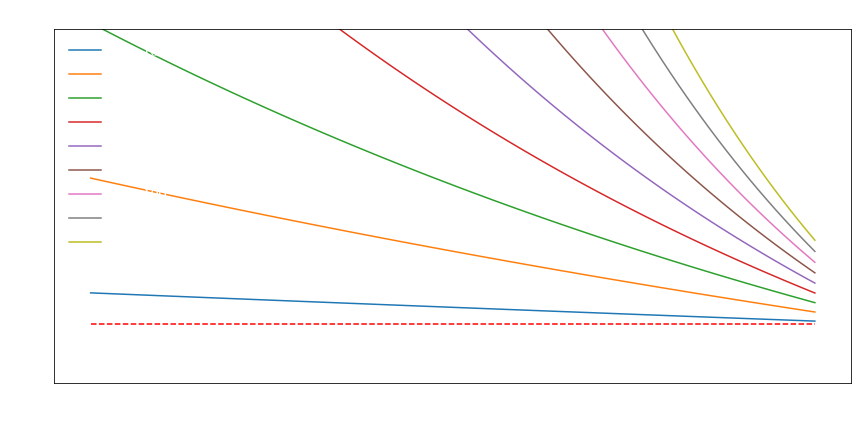

In [7]:
a = np.arange(0.990, 0.999, 0.0001)
N = np.arange(10, 260, 30)

fig, axes = plt.subplots(figsize = (12, 6))

for N_v in N: 
    cond_n = np.zeros_like(a, dtype = np.float64)
    for n, a_v in enumerate(a):
        A, L0 = laguerre_network_dt(a = a_v, N = N_v)
        cond_n[n] = np.linalg.cond(A)
    axes.plot(a, cond_n, label = f"N = {N_v}")

axes.plot(a, np.ones_like(a), linestyle = "--", color = "red")
axes.set_ylim([0.8, 2])

font_plot = "Times"
axes.legend(prop = {"family" : font_plot, "size" : 16}, frameon = False)

axes.set_xlabel("$a$", fontname = font_plot, fontsize = 15, color = "white")
axes.set_ylabel("Condition number of $\mathbf{A}_{\ell}$", fontname = font_plot, fontsize = 15, color = "white")
axes.set_title("Numerical Condition of $\mathbf{A}_{\ell}$", fontname = font_plot, fontsize = 20, color = "white")

plt.tight_layout()
            
for tick in axes.xaxis.get_major_ticks():
    tick.label.set_fontsize(14)
    tick.label.set_fontname(font_plot)

for tick in axes.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)
    tick.label.set_fontname(font_plot)
    
leg = axes.get_legend()
for text in leg.get_texts():
    text.set_color("white")
    
axes.tick_params(color = "white", labelcolor = "white")

fig.savefig("Fig_Ladder_Network.png", dpi = 300, transparent = True)

This experiment has shown that a Legendre basis can be used as well to approximate an unit delay. This is important since it shows that **we might use another set of orthogonal functions to reconstruct the ideal delay system**. 